

# Importing Required Libraries

In [ ]:
# Libraries for Feature Engineering
import seaborn as sns

In [ ]:
# Libraries for Data Structures
import pandas as pd
import numpy as np

In [ ]:
# Libraries for Creating Pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
# Libraries for Data Pre-processing and Processing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Libraries For Model Formation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Libraries for Model Evaluation
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Dataset Customisation

In [ ]:
# Importing Dataset from csv file
raw_data = pd.read_csv('/datasets/heart_disease_uci.csv')

# Gives total no.of rows and columns
raw_data.shape

(920, 16)

## ***DataSet Columns Defination***
    1. id (Unique id for each patient)
    2. age (Age of the patient in years)
    3. origin (place of study)
    4. sex (Male/Female)
    5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    7. chol (serum cholesterol in mg/dl)
    8. fbs (if fasting blood sugar > 120 mg/dl)
    9. restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    10. thalach: maximum heart rate achieved
    11. exang: exercise-induced angina (True/ False)
    12. oldpeak: ST depression induced by exercise relative to rest
    13. slope: the slope of the peak exercise ST segment
    14. ca: number of major vessels (0-3) colored by fluoroscopy
    15. thal: [normal; fixed defect; reversible defect]
    16. num: the predicted attribute


In [ ]:
new_column_names = ['Id', 'Age', 'Gender', 'Origin', 'Chest_Pain', 'Resting_Blood_Pressure', 'Cholestral', 'Fasting_Blood_Sugar',
                    'Resting_ECG', 'Maximum_Heart_Rate_Achieved', 'Exercise_Induced_Angina','ST_Depression_Induced', 'Peak_Exercise_Slope',
                    'No_of_Major_Vessels', 'Thalassemia', 'Target_Variable']
raw_data.rename(columns={old_column_name: new_column_name for old_column_name, new_column_name in zip(raw_data.columns, new_column_names)}, inplace=True)

# Feature Engineering


## Feature Selection

<ipython-input-9-43c298583b53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = raw_data.corr()


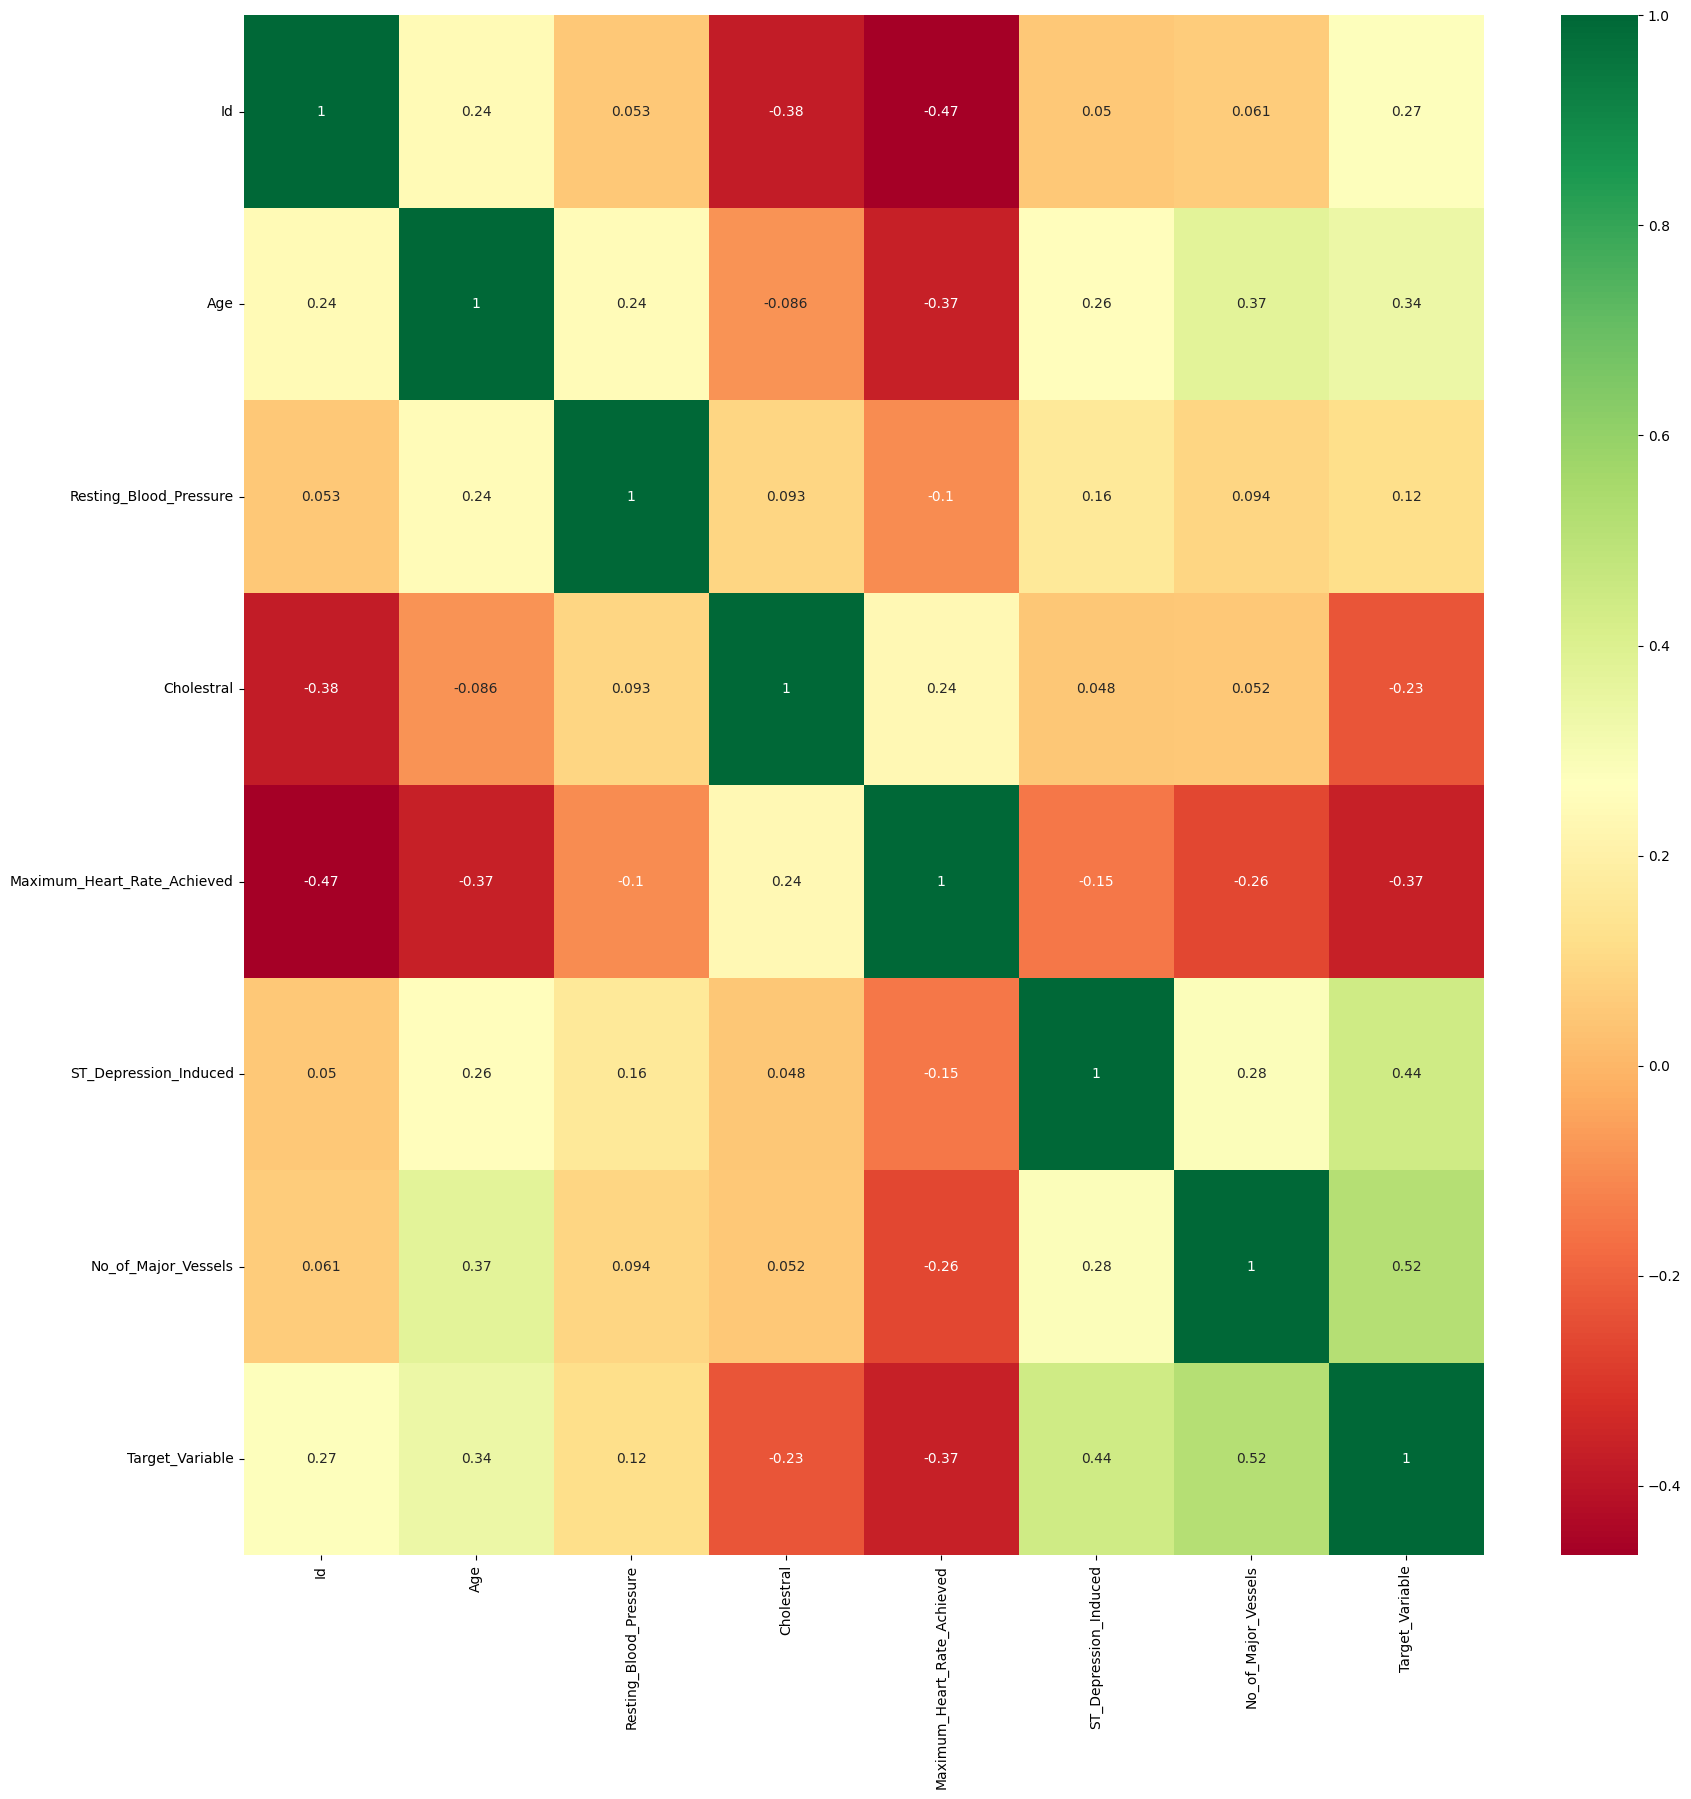

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Dropping Non-Required Featues

In [ ]:
raw_data.drop(['Id', 'Origin'], axis=1, inplace=True)

## Converting Category into Numerical Values

In [ ]:
# Converting Categorical Values to String
raw_data['Gender'] = pd.factorize(raw_data.Gender)[0]
raw_data['Chest_Pain'] = pd.factorize(raw_data.Chest_Pain)[0]
raw_data['Resting_ECG'] = pd.factorize(raw_data.Resting_ECG)[0]
raw_data['Peak_Exercise_Slope'] = pd.factorize(raw_data.Peak_Exercise_Slope)[0]
raw_data['Thalassemia'] = pd.factorize(raw_data.Thalassemia)[0]

# Converting Target Variables to Binary Target Values
raw_data.Target_Variable.replace([1,2,3,4], 1, inplace=True)
raw_data['Target_Variable'].value_counts()

1    509
0    411
Name: Target_Variable, dtype: int64

# Datasets Pre-processing and Processing


## ***DataSet Pre-Processing***

## Dataset Processing(Train-Test Splitting)

In [ ]:
# Separate labels and features
X = raw_data.drop(['Target_Variable'], axis=1)
y = raw_data['Target_Variable']


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)

# Data Augmentation
smote = SMOTE(random_state=42)
X_imputed_smote, y_smote = smote.fit_resample(X_imputed, y)

# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_smote, y_smote, test_size=0.2, random_state=42)

# Model Trainings


## Testing Out Different Models layering on top of one another

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"{best_rf_model} CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Fit the model on the entire dataset
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_rf_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_rf_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42) CV Accuracy: 85.14%
-------------------------------------------------------
RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42) Training Accuracy: 81.37%
-------------------------------------------------------
RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        95
           1       0.87      0.77      0.82       109

    accuracy                           0.81       204
   macro avg       0.82      0.82      0.81       204
weighted avg       0.82      0.81      0.81       204

-------------------------------------------------------


In [ ]:
# LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100]}
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5)
lgbm_grid.fit(X_train, y_train)
best_lgbm_model = lgbm_grid.best_estimator_

# Fit the model on the entire dataset
best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_lgbm_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_lgbm_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb_model = gb_grid.best_estimator_

# Fit the model on the entire dataset
best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_lgbm_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_lgbm_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 400, number of negative: 414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 814, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491400 -> initscore=-0.034401
[LightGBM] [Info] Start training from score -0.034401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10], 'subsample': [0.8, 1.0]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Fit the model on the entire dataset
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_xgb_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_xgb_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) Training Accuracy: 80.39%
-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_byno

In [ ]:

# Support Vector Classifier
svc_model = make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))
svc_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_model, svc_params, cv=5)
svc_grid.fit(X_train, y_train)
best_svc_model = svc_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True, random_state=42))]) Training Accuracy: 80.39%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True, random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.84      0.78      0.81       109

    accuracy                           0.80       204
   macro avg       0.80      0.81      0.80       204
weighted avg       0.81      0.80      0.80       204

-------------------------------------------------------


In [ ]:

# MLP Classifier
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
mlp_params = {'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=5)
mlp_grid.fit(X_train, y_train)
best_mlp_model = mlp_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True, random_state=42))]) Training Accuracy: 80.39%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True, random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.84      0.78      0.81       109

    accuracy                           0.80       204
   macro avg       0.80      0.81      0.80       204
weighted avg       0.81      0.80      0.80       204

-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
